In [2]:
# transform method from .txt to csv file format
# comment out

import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# Define the directory containing the .txt files relative to the current working directory
data_directory = os.path.join(current_directory, 'big_keystroke_data')

# Loop through all the files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.txt'):
        txt_file_path = os.path.join(data_directory, filename)

        # Define the new .csv file path
        csv_file_path = os.path.join(data_directory, filename.replace('.txt', '.csv'))

        try:
            # Read the .txt file into a pandas DataFrame, skipping bad lines
            df = pd.read_csv(txt_file_path, sep="\t", encoding='utf-8', on_bad_lines='skip')  # Try UTF-8 first
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(txt_file_path, sep="\t", encoding='ISO-8859-1',
                                 on_bad_lines='skip')  # Fallback to ISO-8859-1
            except Exception as e:
                print(f"Error reading {filename}: {e}")
                continue

        # Save the DataFrame as a .csv file
        df.to_csv(csv_file_path, index=False)

        print(f"Converted {filename} to {csv_file_path}")

print("All files converted!")


All files converted!


In [3]:
# comment out
import os


def delete_txt_files(directory):
    """
    Delete all .txt files in the specified directory.

    Parameters:
    directory (str): The path to the directory where .txt files should be deleted.
    """
    # Loop through all the files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)

            try:
                # Remove the file
                os.remove(file_path)
                print(f"Deleted {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")


# Example usage:
current_directory = os.getcwd()
data_directory = os.path.join(current_directory, 'big_keystroke_data')
delete_txt_files(data_directory)

In [3]:
import pandas as pd

df_user = pd.read_csv('demographics_csv/metadata_participants.csv', sep=',')

print(df_user.head())
print(df_user.columns)

# Drop rows with any NaN or null values
df_user = df_user.dropna()

   PARTICIPANT_ID  AGE  GENDER  HAS_TAKEN_TYPING_COURSE COUNTRY  LAYOUT  \
0               3   30    none                        0      US  qwerty   
1               5   27  female                        0      MY  qwerty   
2               7   13  female                        0      AU  qwerty   
3              23   21  female                        0      IN  qwerty   
4              24   21  female                        0      PH  qwerty   

  NATIVE_LANGUAGE FINGERS  TIME_SPENT_TYPING KEYBOARD_TYPE  ERROR_RATE  \
0              en     1-2                  8          full    0.511945   
1              en     7-8                  6        laptop    0.871080   
2              en     7-8                  0        laptop    6.685633   
3              en     3-4                  0          full    2.130493   
4              tl     7-8                  1        laptop    1.893287   

   AVG_WPM_15     AVG_IKI      ECPC      KSPC     ROR  
0     61.9483  169.224722  0.052901  1.151877  0

In [4]:
# Filter the DataFrame for rows where the GENDER column is 'none'

import pandas as pd

# Drop all rows where the 'GENDER' column is 'none'
df_user = df_user[df_user['GENDER'] != 'none']

# Optionally, save the cleaned DataFrame to a new CSV file
df_user.to_csv('demographics_csv/cleaned_metadata_overview_participants.csv', index=False)

none_gender_rows = df_user[df_user['GENDER'] == 'none']

# Print the filtered rows
print(none_gender_rows)

print(df_user)


Empty DataFrame
Columns: [PARTICIPANT_ID, AGE, GENDER, HAS_TAKEN_TYPING_COURSE, COUNTRY, LAYOUT, NATIVE_LANGUAGE, FINGERS, TIME_SPENT_TYPING, KEYBOARD_TYPE, ERROR_RATE, AVG_WPM_15, AVG_IKI, ECPC, KSPC, ROR]
Index: []
        PARTICIPANT_ID  AGE  GENDER  HAS_TAKEN_TYPING_COURSE COUNTRY  LAYOUT  \
1                    5   27  female                        0      MY  qwerty   
2                    7   13  female                        0      AU  qwerty   
3                   23   21  female                        0      IN  qwerty   
4                   24   21  female                        0      PH  qwerty   
5                   25   19    male                        0      IN  qwerty   
...                ...  ...     ...                      ...     ...     ...   
168589          517932   20    male                        0      US  qwerty   
168590          517936   25    male                        0      PL  qwerty   
168591          517943   38  female                        1   

C:\Users\dekassla\AppData\Local\Temp\ipykernel_4824\1935941246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


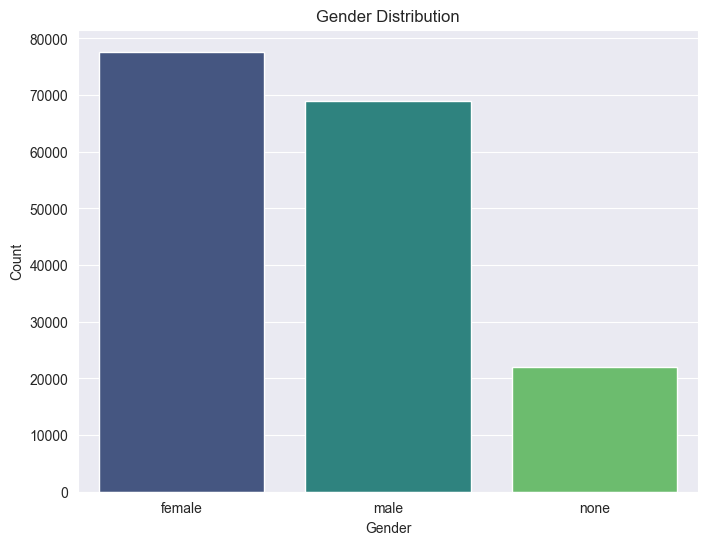

Gender Percentages:
female    46.063450
male      40.887088
none      13.049462
Name: GENDER, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean the data by replacing NaN and infinite values
df_user.replace([np.inf, -np.inf], np.nan, inplace=True)
df_user.dropna(subset=['GENDER'], inplace=True)

# Ensure that the 'GENDER' column does not contain any None or NaN values
if df_user['GENDER'].isnull().any():
    raise ValueError("The 'GENDER' column contains NaN values. Please clean the data.")

# 1. Plotting Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df_user['GENDER'].value_counts()
gender_percentages = gender_counts / len(df_user) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print gender percentages
print("Gender Percentages:")
print(gender_percentages)

C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3435280921.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


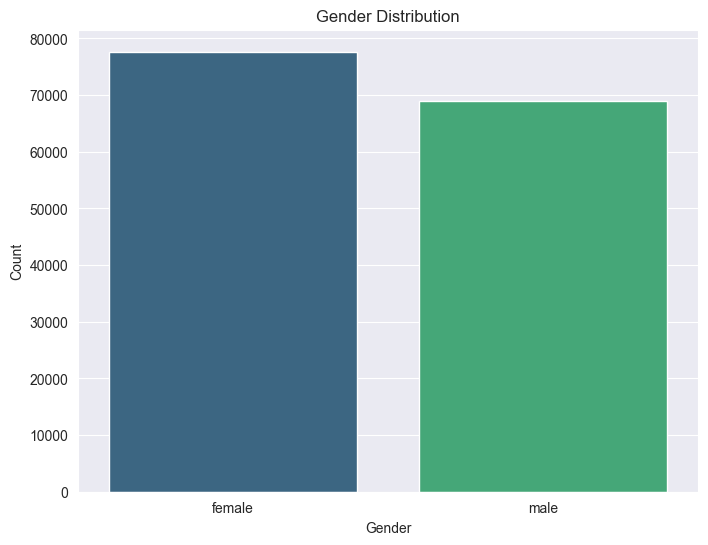

Gender Percentages:
female    52.976613
male      47.023387
Name: GENDER, dtype: float64


C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3435280921.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


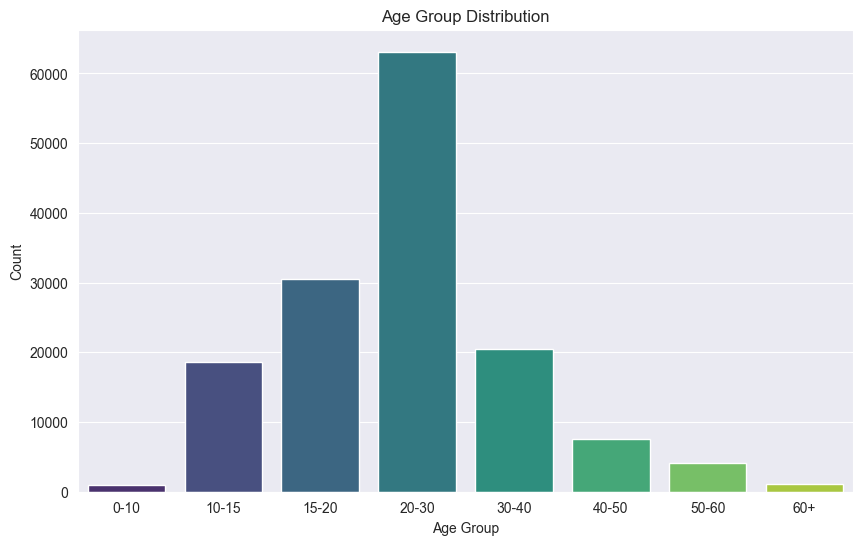

Age Group Percentages:
0-10      0.648810
10-15    12.725821
15-20    20.829467
20-30    43.047293
30-40    13.959311
40-50     5.180930
50-60     2.788997
60+       0.758651
Name: AGE_GROUP, dtype: float64


C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3435280921.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


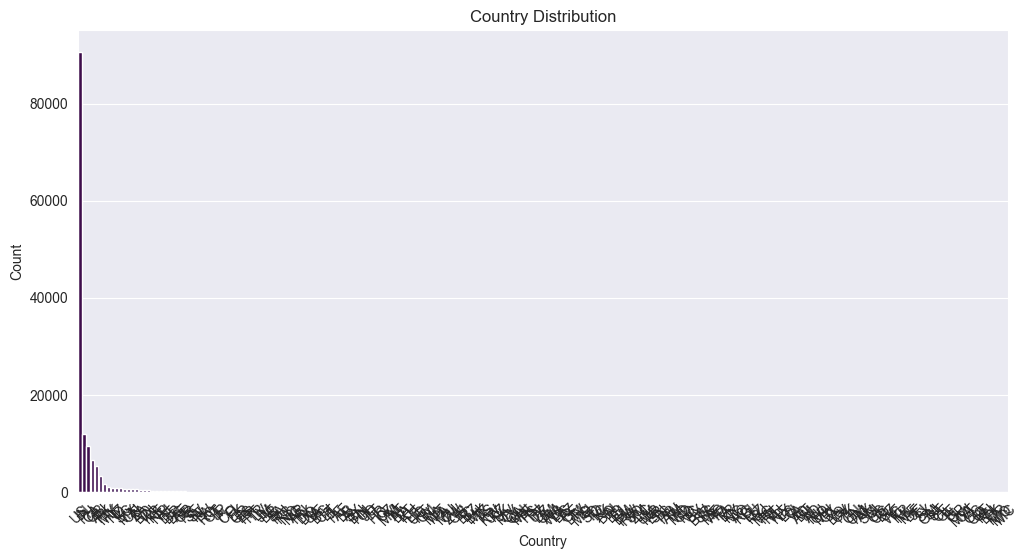

C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3435280921.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')


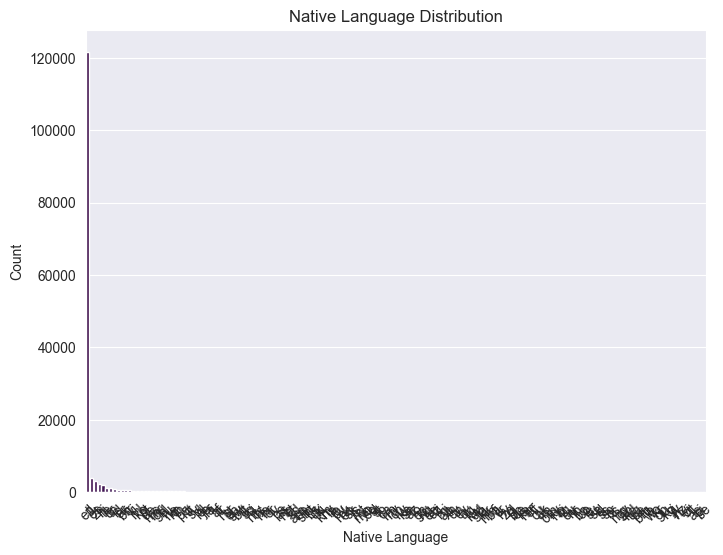

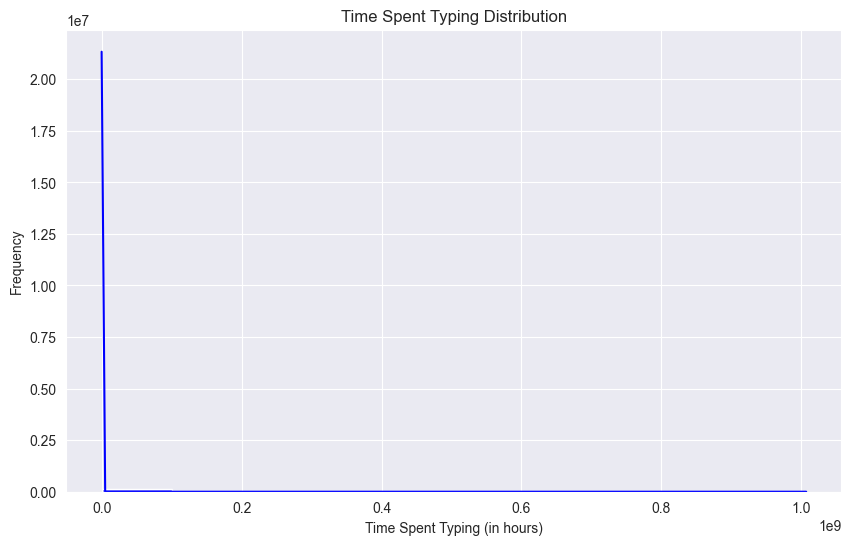

C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3435280921.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')


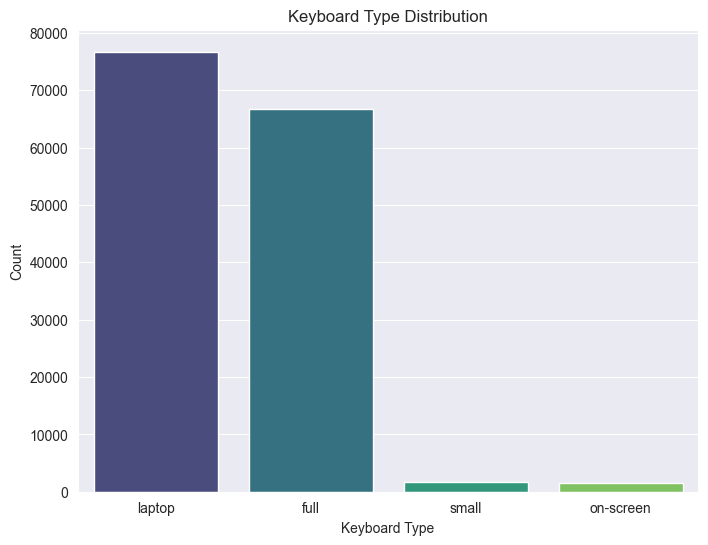

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean the data by replacing NaN and infinite values
df_user.replace([np.inf, -np.inf], np.nan, inplace=True)
df_user.dropna(subset=['GENDER', 'AGE', 'COUNTRY', 'NATIVE_LANGUAGE', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE'],
               inplace=True)

# 1. Plotting Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df_user['GENDER'].value_counts()
gender_percentages = gender_counts / len(df_user) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print gender percentages
print("Gender Percentages:")
print(gender_percentages)

# 2. Plotting Age Distribution
bins = [0, 10, 15, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_user['AGE_GROUP'] = pd.cut(df_user['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
age_group_counts = df_user['AGE_GROUP'].value_counts().sort_index()
age_group_percentages = age_group_counts / len(df_user) * 100
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Print age group percentages
print("Age Group Percentages:")
print(age_group_percentages)

# 3. Plotting Country Distribution
plt.figure(figsize=(12, 6))
country_counts = df_user['COUNTRY'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Plotting Native Language Distribution
plt.figure(figsize=(8, 6))
native_language_counts = df_user['NATIVE_LANGUAGE'].value_counts()
sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')
plt.title("Native Language Distribution")
plt.xlabel("Native Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Plotting Time Spent Typing Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_user['TIME_SPENT_TYPING'], bins=10, kde=True, color='blue')
plt.title("Time Spent Typing Distribution")
plt.xlabel("Time Spent Typing (in hours)")
plt.ylabel("Frequency")
plt.show()

# 6. Plotting Keyboard Type Distribution
plt.figure(figsize=(8, 6))
keyboard_type_counts = df_user['KEYBOARD_TYPE'].value_counts()
sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')
plt.title("Keyboard Type Distribution")
plt.xlabel("Keyboard Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# erase outlier in age, as participants are less likely to be 0-10 years old for real

In [10]:
# only if participant csv files are being included and used for investigation

df_experiment = df_user;

# import os
# import pandas as pd
# 
# # Define the directory containing the .csv files
# data_directory = os.path.join(os.getcwd(), 'big_keystroke_data')
# 
# # Initialize an empty list to hold individual DataFrames
# dataframes = []
# 
# # Define the files to exclude
# exclude_files = ['metadata_participants.csv']
# 
# # Loop through all the files in the directory
# for filename in os.listdir(data_directory):
#     if filename.endswith('.csv') and filename not in exclude_files:
#         csv_file_path = os.path.join(data_directory, filename)
#         
#         # Read each CSV file into a pandas DataFrame
#         df = pd.read_csv(csv_file_path)
#         
#         # Append the DataFrame to the list
#         dataframes.append(df)
# 
# # Concatenate all DataFrames in the list into a single DataFrame
# df_experiment = pd.concat(dataframes, ignore_index=True)
# 
# # Optionally, print the combined DataFrame or save it to a new CSV file
# print(df_experiment)
# # combined_dataframe.to_csv(os.path.join(data_directory, 'combined_data.csv'), index=False)

In [11]:
import pandas as pd

# Merge the two DataFrames on PARTICIPANT_ID
df_combined = pd.merge(df_user, df_experiment, on='PARTICIPANT_ID', how='inner')

# Optionally, print the first few rows of the combined DataFrame
print(df_combined.head())

df_combined = df_user

# You can also save the combined DataFrame to a CSV file if needed
# df_combined.to_csv('combined_data.csv', index=False)

   PARTICIPANT_ID  AGE_x GENDER_x  HAS_TAKEN_TYPING_COURSE_x COUNTRY_x  \
0               5     27   female                          0        MY   
1               7     13   female                          0        AU   
2              23     21   female                          0        IN   
3              24     21   female                          0        PH   
4              25     19     male                          0        IN   

  LAYOUT_x NATIVE_LANGUAGE_x FINGERS_x  TIME_SPENT_TYPING_x KEYBOARD_TYPE_x  \
0   qwerty                en       7-8                    6          laptop   
1   qwerty                en       7-8                    0          laptop   
2   qwerty                en       3-4                    0            full   
3   qwerty                tl       7-8                    1          laptop   
4   qwerty                en       7-8                    1          laptop   

   ...  NATIVE_LANGUAGE_y  FINGERS_y  TIME_SPENT_TYPING_y  KEYBOARD_TYPE_y  \
0 

In [10]:
# Check for any NaN values in the resulting DataFrame
nan_values = df_combined.isna().sum()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
AGE_GROUP    89
dtype: int64


In [9]:
# aim to plot age data
#TODO test

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_and_clean_column(df, column, outlier_range=(0, 10)):
    """
    Plots the specified column and removes rows with values in the outlier range.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column to plot and clean.
    outlier_range (tuple): The range of values to consider as outliers (inclusive).

    Returns:
    pd.DataFrame: The cleaned DataFrame with outliers removed.
    """
    # Plot the column
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Remove outliers
    cleaned_df = df[~df[column].between(outlier_range[0], outlier_range[1], inclusive='both')]

    return cleaned_df

# Example usage:
# df_combined = pd.read_csv('your_data.csv')
# df_cleaned = plot_and_clean_column(df_combined, 'AGE')

C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3393245387.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


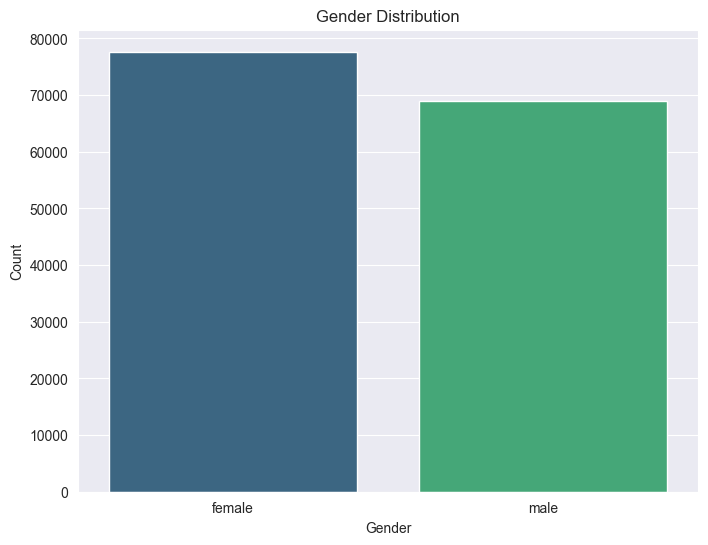

Gender Percentages:
female    52.976613
male      47.023387
Name: GENDER, dtype: float64


C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3393245387.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


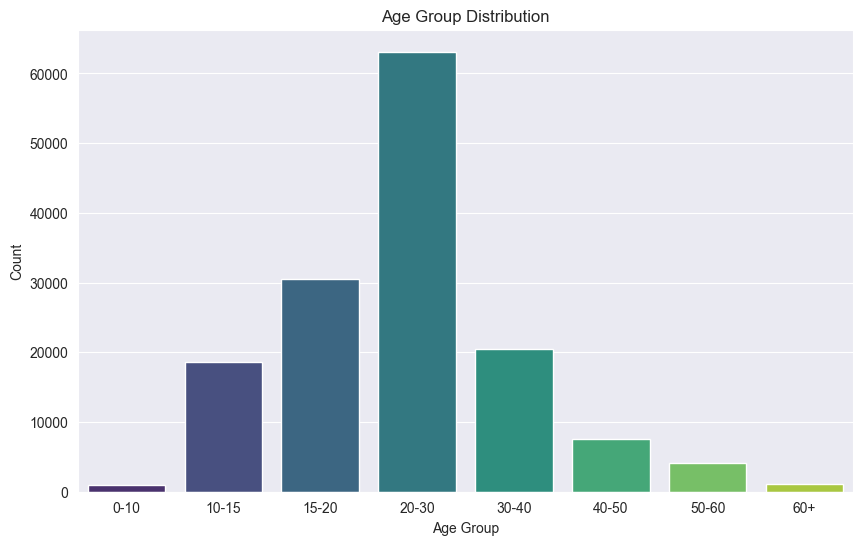

Age Group Percentages:
0-10      0.648810
10-15    12.725821
15-20    20.829467
20-30    43.047293
30-40    13.959311
40-50     5.180930
50-60     2.788997
60+       0.758651
Name: AGE_GROUP, dtype: float64


C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3393245387.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


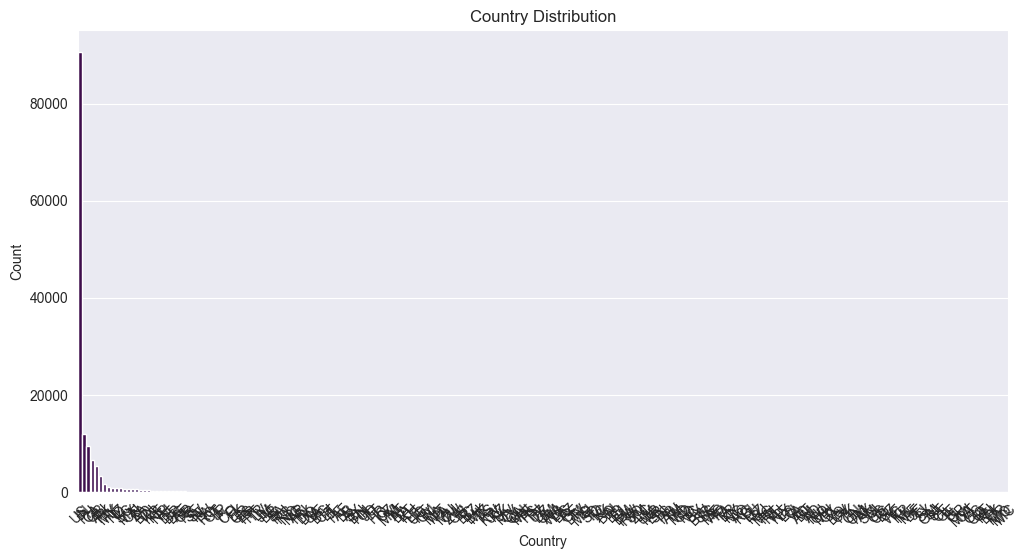

C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3393245387.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')


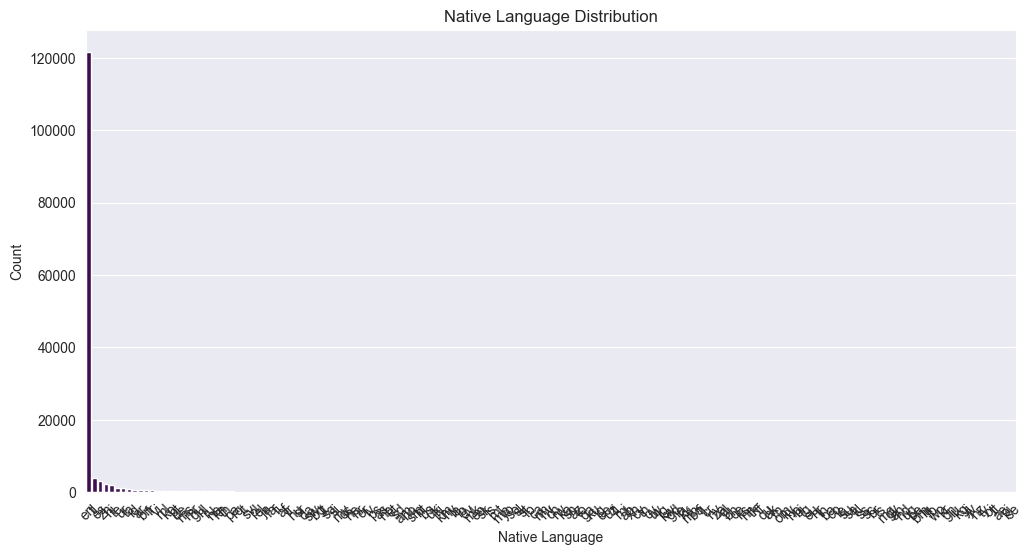

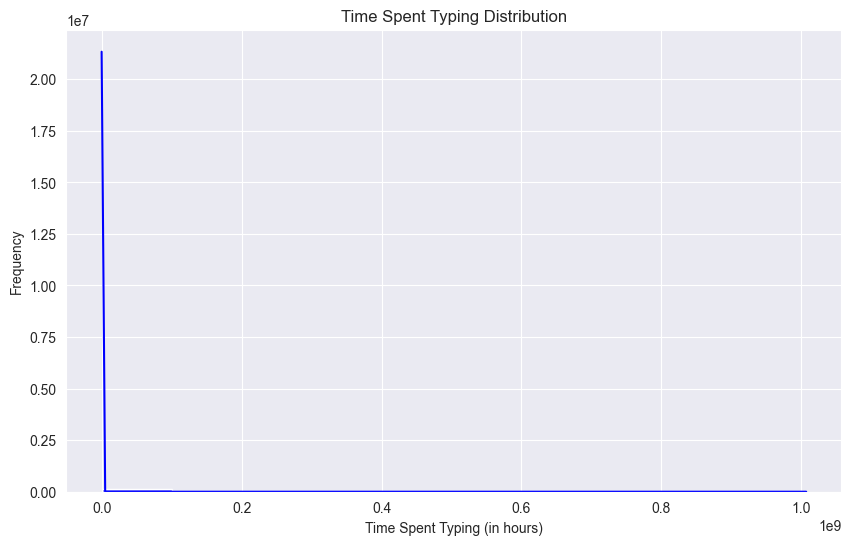

C:\Users\dekassla\AppData\Local\Temp\ipykernel_22236\3393245387.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')


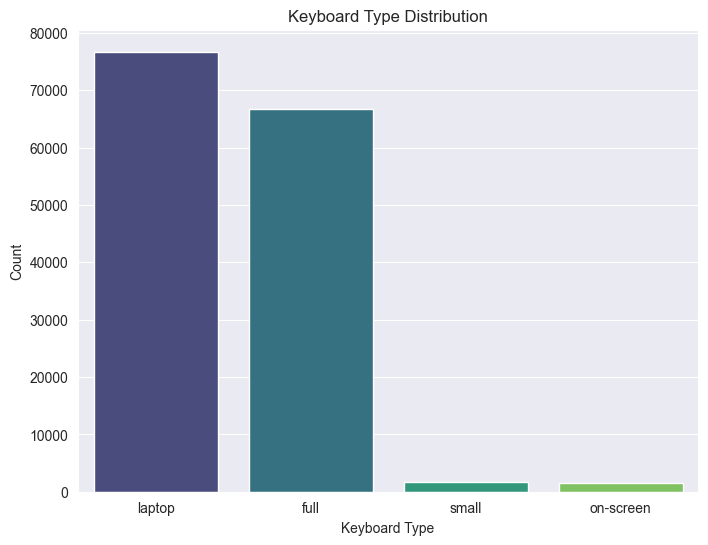

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined is your combined DataFrame after merging

# 1. Plotting Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df_combined['GENDER'].value_counts()
gender_percentages = gender_counts / len(df_combined) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print gender percentages
print("Gender Percentages:")
print(gender_percentages)

# 2. Plotting Age Distribution
bins = [0, 10, 15, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_combined['AGE_GROUP'] = pd.cut(df_combined['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
age_group_counts = df_combined['AGE_GROUP'].value_counts().sort_index()
age_group_percentages = age_group_counts / len(df_combined) * 100
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Print age group percentages
print("Age Group Percentages:")
print(age_group_percentages)

# 3. Plotting Country Distribution
plt.figure(figsize=(12, 6))
country_counts = df_combined['COUNTRY'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Plotting Native Language Distribution
plt.figure(figsize=(12, 6))
native_language_counts = df_combined['NATIVE_LANGUAGE'].value_counts()
sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')
plt.title("Native Language Distribution")
plt.xlabel("Native Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Plotting Time Spent Typing Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['TIME_SPENT_TYPING'], bins=10, kde=True, color='blue')
plt.title("Time Spent Typing Distribution")
plt.xlabel("Time Spent Typing (in hours)")
plt.ylabel("Frequency")
plt.show()

# 6. Plotting Keyboard Type Distribution
plt.figure(figsize=(8, 6))
keyboard_type_counts = df_combined['KEYBOARD_TYPE'].value_counts()
sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')
plt.title("Keyboard Type Distribution")
plt.xlabel("Keyboard Type")
plt.ylabel("Count")
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df_combined is your DataFrame
# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC',
            'ROR']
target = 'GENDER'

X = df_combined[features]
y = df_combined[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE)
# and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Create a pipeline that combines the preprocessor with the KNN classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

      female       0.57      0.59      0.58     15424
        male       0.52      0.50      0.51     13892

    accuracy                           0.55     29316
   macro avg       0.54      0.54      0.54     29316
weighted avg       0.55      0.55      0.55     29316


In [ ]:
# TODO test method
# faster version to train (knn), target: to be predicted value, features: to train with

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


def train_fast(df, target, features):
    # Select the features and target
    X = df[features]
    y = df[target]

    # One-hot encode categorical variables and standardize numerical variables
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(),
             ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['FINGERS', 'KEYBOARD_TYPE'])
        ])

    # Create a pipeline that combines the preprocessor with the KNN classifier
    knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', KNeighborsClassifier(n_neighbors=5))])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the KNN model
    knn_pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results
    print(f'Accuracy: {accuracy:.2f}')
    print(report)

    # Function to plot confusion matrix
    def plot_confusion_matrix(y_true, y_pred, labels):
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot the confusion matrix
        fig, ax = plt.subplots(figsize=(8, 6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(ax=ax, cmap=plt.cm.Blues)

        plt.title("Confusion Matrix")
        plt.show()

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=knn_pipeline.named_steps['classifier'].classes_)

    return accuracy, report

# Example usage:
# df_combined = pd.read_csv('your_data.csv')
# features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']
# target = 'GENDER'
# train_and_evaluate_knn(df_combined, target, features)

Accuracy: 0.55
              precision    recall  f1-score   support

      female       0.57      0.59      0.58     15424
        male       0.52      0.50      0.51     13892

    accuracy                           0.55     29316
   macro avg       0.54      0.54      0.54     29316
weighted avg       0.55      0.55      0.55     29316


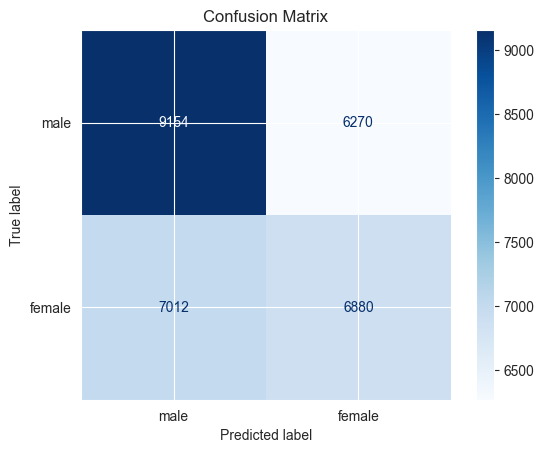

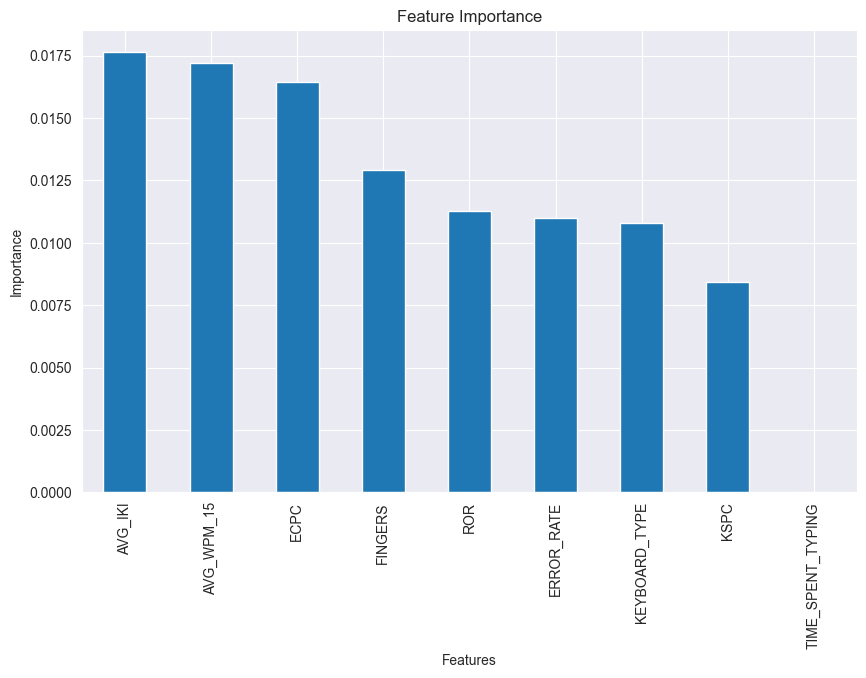

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assume df_combined is your DataFrame
# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']
target = 'GENDER'

X = df_combined[features]
y = df_combined[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE) and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Create a pipeline that combines the preprocessor with the KNN classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix with standard blue color
ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test, display_labels=['male', 'female'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Calculate feature importance using permutation importance
result = permutation_importance(knn_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
importance = result.importances_mean

# Visualize feature importance
feature_importance = pd.Series(importance, index=features)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# TODO:  not yet tested
# method to pass df, target as value to be predicted, features to train with

def train_slow(df, target, features):
    # Select the features and target
    X = df[features]
    y = df[target]

    # One-hot encode categorical variables and standardize numerical variables
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(),
             ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['FINGERS', 'KEYBOARD_TYPE'])
        ])

    # Create a pipeline that combines the preprocessor with the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Predict on the test data
    y_pred = grid_search.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    best_params = grid_search.best_params_

    # Print the results
    print(f'Accuracy: {accuracy:.2f}')
    print(report)
    print("Best parameters found: ", best_params)

    return accuracy, report, best_params

# Example usage:
# df_combined = pd.read_csv('your_data.csv')
# features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']
# target = 'GENDER'
# train_and_evaluate_model(df_combined, target, features)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df_combined is your DataFrame
# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC',
            'ROR']
target = 'GENDER'

X = df_combined[features]
y = df_combined[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE) and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Create a pipeline that combines the preprocessor with the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Accuracy: 0.59
              precision    recall  f1-score   support

      female       0.60      0.70      0.65     15424
        male       0.59      0.47      0.53     13892

    accuracy                           0.59     29316
   macro avg       0.59      0.59      0.59     29316
weighted avg       0.59      0.59      0.59     29316

Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


Accuracy: 0.55
              precision    recall  f1-score   support

      female       0.57      0.59      0.58     15424
        male       0.52      0.50      0.51     13892

    accuracy                           0.55     29316
   macro avg       0.54      0.54      0.54     29316
weighted avg       0.55      0.55      0.55     29316


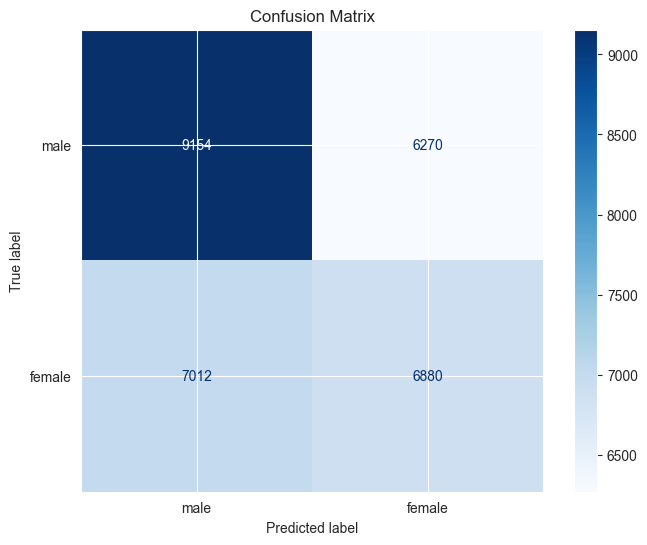

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df_combined is your DataFrame
# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC',
            'ROR']
target = 'GENDER'

X = df_combined[features]
y = df_combined[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE)
# and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Create a pipeline that combines the preprocessor with the KNN classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
    labels: list of strings
        The list of labels for the classes.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues)

    plt.title("Confusion Matrix")
    plt.show()


# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['male', 'female'])

In [12]:
import pandas as pd
import numpy as np


def create_gender_balanced_dataframe(df, gender_column='GENDER'):
    """
    Create a gender-balanced DataFrame with equal distribution of male and female.

    Parameters:
    df (pd.DataFrame): The original DataFrame.
    gender_column (str): The name of the gender column.

    Returns:
    pd.DataFrame: A new DataFrame with equal distribution of male and female.
    """
    # Separate the DataFrame by gender
    df_male = df[df[gender_column] == 'male']
    df_female = df[df[gender_column] == 'female']

    # Determine the minimum count between the two genders
    min_count = min(len(df_male), len(df_female))

    # Randomly sample the minimum count from both gender DataFrames
    df_male_sampled = df_male.sample(n=min_count, random_state=42)
    df_female_sampled = df_female.sample(n=min_count, random_state=42)

    # Concatenate the sampled DataFrames to create a balanced DataFrame
    df_gender_balanced = pd.concat([df_male_sampled, df_female_sampled])

    # Shuffle the DataFrame to mix the rows
    df_gender_balanced = df_gender_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    return df_gender_balanced

# Example usage:
df_gender_balanced = create_gender_balanced_dataframe(df_combined, gender_column='GENDER')

D:\Coding_Projects\erkd_schieben\erkd\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5691 - loss: 0.6786 - val_accuracy: 0.5782 - val_loss: 0.6733
Epoch 2/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5786 - loss: 0.6729 - val_accuracy: 0.5747 - val_loss: 0.6733
Epoch 3/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5760 - loss: 0.6730 - val_accuracy: 0.5808 - val_loss: 0.6724
Epoch 4/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5783 - loss: 0.6716 - val_accuracy: 0.5774 - val_loss: 0.6744
Epoch 5/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5817 - loss: 0.6707 - val_accuracy: 0.5835 - val_loss: 0.6714
Epoch 6/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5829 - loss: 0.6700 - val_accuracy: 0.5781 - val_loss: 0.6726
Epoch 7/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5824 - loss: 0.6696 - val_accuracy: 0.5778 - val_loss: 0.6725
Epoch 8/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5850 - loss: 0.6697 - 

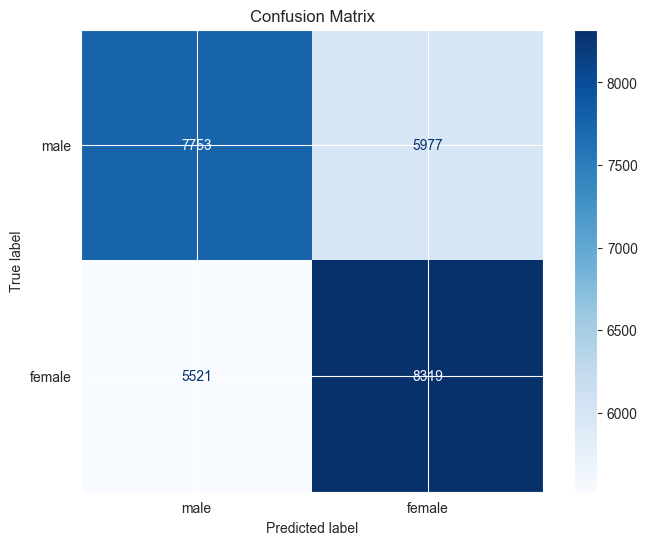

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assume df_combined is your combined DataFrame after merging

# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC',
            'ROR']
target = 'GENDER'

df_gender_balanced = create_gender_balanced_dataframe(df_user)

X = df_gender_balanced[features]
y = df_gender_balanced[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE)
# and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Apply preprocessing to the features
X = preprocessor.fit_transform(X)

# Encode target variable if it's categorical (e.g., 'male', 'female')
y = np.where(y == 'male', 0, 1)  # Assuming binary gender classification (0: male, 1: female)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
    labels: list of strings
        The list of labels for the classes.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues)

    plt.title("Confusion Matrix")
    plt.show()


# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['male', 'female'])

Epoch 1/20


D:\Coding_Projects\erkd_schieben\erkd\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3447/3447 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5639 - loss: 0.6802 - val_accuracy: 0.5757 - val_loss: 0.6742
Epoch 2/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5782 - loss: 0.6735 - val_accuracy: 0.5767 - val_loss: 0.6734
Epoch 3/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5792 - loss: 0.6722 - val_accuracy: 0.5805 - val_loss: 0.6720
Epoch 4/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5801 - loss: 0.6708 - val_accuracy: 0.5742 - val_loss: 0.6734
Epoch 5/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5799 - loss: 0.6715 - val_accuracy: 0.5769 - val_loss: 0.6725
Epoch 6/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5807 - loss: 0.6711 - val_accuracy: 0.5804 - val_loss: 0.6713
Epoch 7/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5815 - loss: 0.6702 - val_accuracy: 0.5787 - val_loss: 0.6723
Epoch 8/20
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5829 - loss: 0.6694 - val_accura

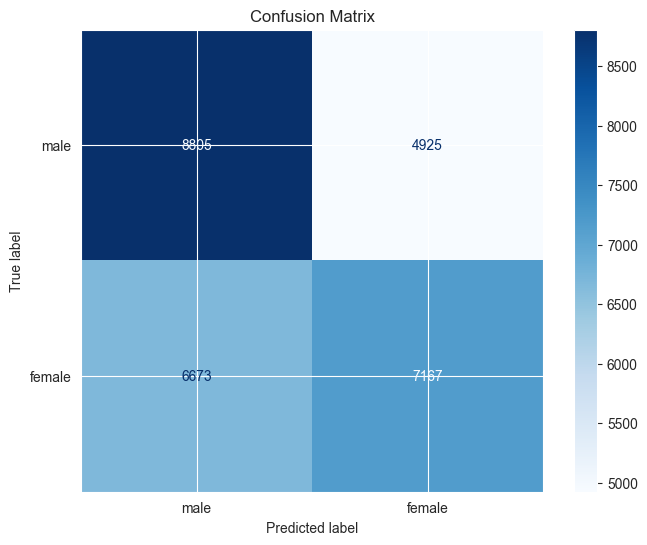

862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step


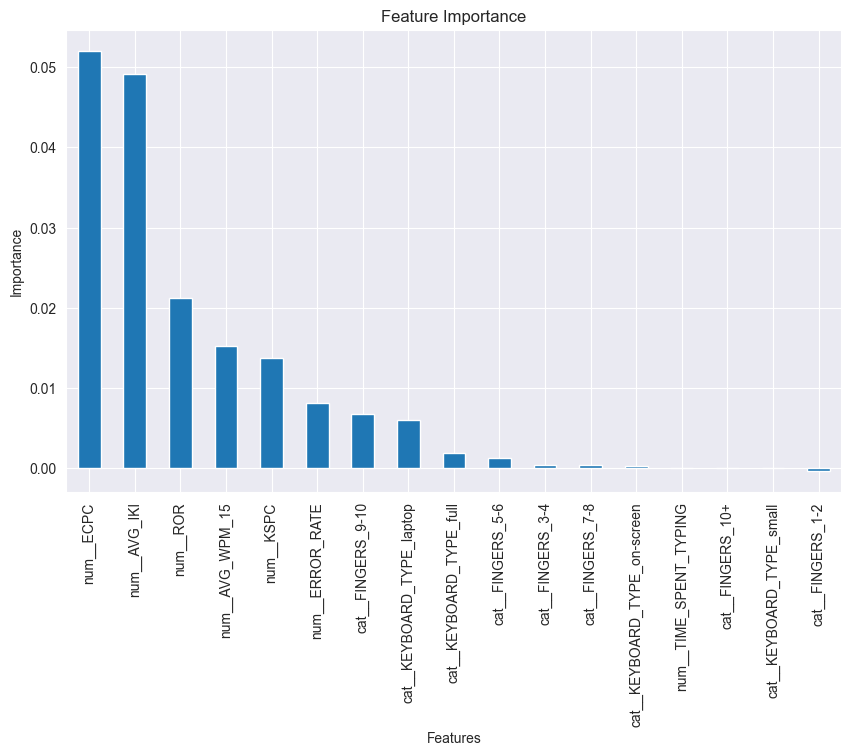

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

# Assume df_combined is your combined DataFrame after merging

# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']
target = 'GENDER'

# Assuming `df_gender_balanced` is already preprocessed
# df_gender_balanced = create_gender_balanced_dataframe(df_user)

X = df_gender_balanced[features]
y = df_gender_balanced[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE) and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Apply preprocessing to the features
X = preprocessor.fit_transform(X)

# Encode target variable if it's categorical (e.g., 'male', 'female')
y = np.where(y == 'male', 0, 1)  # Assuming binary gender classification (0: male, 1: female)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Wrap the Keras model with a classifier wrapper
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        self.keras_model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        probs = self.keras_model.predict(X)
        return (probs > 0.5).astype(int)

    def predict_proba(self, X):
        return self.keras_model.predict(X)

# Wrap the trained model
wrapped_model = KerasClassifierWrapper(model)

# Predict on the test set
y_pred_probs = wrapped_model.predict_proba(X_test)
y_pred = wrapped_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
    labels: list of strings
        The list of labels for the classes.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues)

    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['male', 'female'])

# Calculate feature importance using permutation importance
result = permutation_importance(
    wrapped_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
importance = result.importances_mean

# Visualize feature importance
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.Series(importance, index=feature_names)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [13]:
# comment out

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Display the first few rows to verify
print(df_gender_balanced.head())

# Define the key features
key_features = ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']

# Ensure key features are present in the DataFrame
missing_features = [feat for feat in key_features if feat not in df_gender_balanced.columns]
if missing_features:
    raise KeyError(f"Missing features in dataframe_balanced: {missing_features}")

# Filter the DataFrame to include only the specified key features
data_keys = df_gender_balanced[key_features]

# Clean the DataFrame by filling missing values with the mean of the column
data_keys = data_keys.fillna(data_keys.mean())

# Encode the gender labels as binary values
df_gender_balanced['GENDER'] = df_gender_balanced['GENDER'].map({'Female': 0, 'Male': 1})

# Ensure the gender column is present
if 'GENDER' not in df_gender_balanced.columns:
    raise KeyError("Gender column is missing in dataframe_balanced")

# Check for NaN values in the gender column before dropping
if df_gender_balanced['GENDER'].isnull().any():
    print("NaN values found in the GENDER column. Please clean the data.")
else:
    # Drop rows with NaN values in the gender column
    df_gender_balanced = df_gender_balanced.dropna(subset=['GENDER'])

    # Extract the gender labels
    gender_labels = df_gender_balanced['GENDER']

    # Ensure gender_labels is not empty
    if gender_labels.empty:
        raise ValueError("Gender labels are empty after dropping NaN values. Please check the data.")

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(data_keys, gender_labels, test_size=0.2, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = keras.models.Sequential()
    model.add(layers.Input(shape=(len(key_features),)))
    model.add(layers.Dense(int(len(key_features) * 1.5), activation="relu"))
    model.add(layers.Dense(int(len(key_features) * 0.8), activation="relu"))
    model.add(layers.Dense(int(len(key_features) * 0.5), activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))  # Use sigmoid for binary classification

    # Compile the model
    model.compile(optimizer=keras.optimizers.SGD(0.01), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model
    history = model.fit(X_train_scaled, Y_train, batch_size=32, epochs=100, validation_data=(X_test_scaled, Y_test))

    # Check if the training history is available
    print(history.history)

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


    # Plot confusion matrix
    def plot_confusion_matrix(model, X_test, Y_test):
        # Predict the gender on the test set
        Y_pred = (model.predict(X_test) > 0.5).astype("int32")

        # Compute the confusion matrix
        cm = confusion_matrix(Y_test, Y_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'],
                    yticklabels=['Female', 'Male'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()


    # Usage
    plot_confusion_matrix(model, X_test_scaled, Y_test)

   PARTICIPANT_ID  AGE  GENDER  HAS_TAKEN_TYPING_COURSE COUNTRY  LAYOUT  \
0          215191   22    male                        0      US  qwerty   
1          160731   29    male                        1      US  qwerty   
2          292344   27  female                        0      US  qwerty   
3          285726   25    male                        0      US  qwerty   
4          274460   18    male                        0      BN  qwerty   

  NATIVE_LANGUAGE FINGERS  TIME_SPENT_TYPING KEYBOARD_TYPE  ERROR_RATE  \
0              en     7-8                  0        laptop    1.791531   
1              en    9-10                  3          full    1.079137   
2              en    9-10                  1        laptop    0.000000   
3              en    9-10                  5          full    0.082919   
4              en     5-6                  2        laptop    1.641587   

   AVG_WPM_15     AVG_IKI      ECPC      KSPC     ROR  
0     57.5006  167.492368  0.103279  1.247541  0

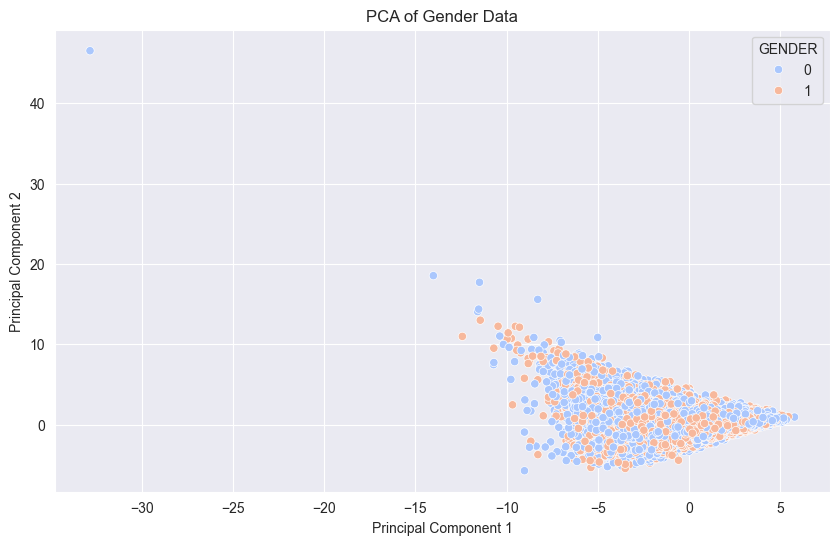

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your preprocessed feature matrix and y is your target variable
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['GENDER'] = y  # Add the target variable for color coding

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='GENDER', data=df_pca, palette='coolwarm')
plt.title('PCA of Gender Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()